<a href="https://colab.research.google.com/github/esedagha/LaSilla24/blob/main/Exoplanet_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#!git clone https://github.com/esedagha/LaSilla24
!ls LaSilla24/Exoplanet_lecture/

51Peg_RVs.ascii


Text(0.5, 0, 'Time [days]')

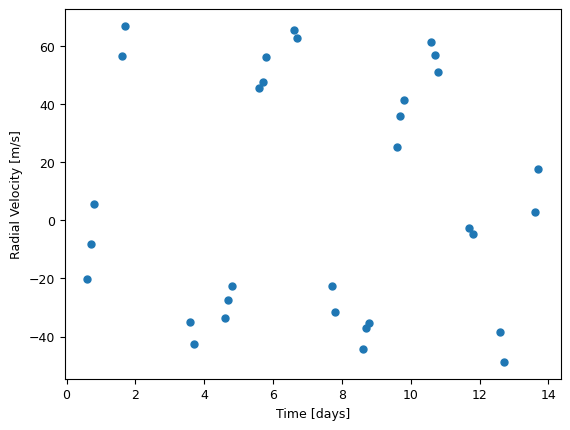

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data  = np.loadtxt('LaSilla24/Exoplanet_lecture/51Peg_RVs.ascii')
t, RV = data[:,0], data[:,1]
plt.plot(t, RV, 'o')
plt.ylabel('Radial Velocity [m/s]')
plt.xlabel('Time [days]')

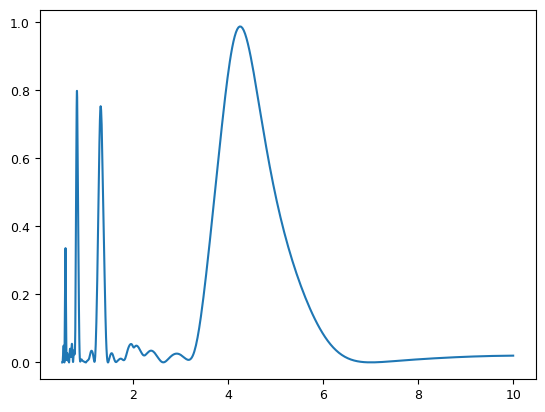

In [35]:
from astropy.timeseries import LombScargle
RV_err           = 10     # uncertainty in RV
Pmin, Pmax       = 0.5, 10 # in days
frequency, power = LombScargle(t, RV, RV_err).autopower(minimum_frequency=1/Pmax,
                                                   maximum_frequency=1/Pmin,
                                                   samples_per_peak=50)
plt.plot(1/frequency, power)

In [36]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
ls = LombScargle(t, RV, RV_err)
y_fit = ls.model(t_fit, best_frequency)

In [41]:
print(1./best_frequency)

4.239482200647249
